Import the tidyverse and configure your notebook for nicely sized output.

In [1]:
library("tidyverse")
options(repr.plot.width = 3, repr.plot.height = 4, repr.plot.res = 300)

Warning message:
“replacing previous import ‘vctrs::data_frame’ by ‘tibble::data_frame’ when loading ‘dplyr’”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.1
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



The data for this assignment is lines of dialogue from [Avatar: The Last Airbender](https://avatar.fandom.com/wiki/Avatar:_The_Last_Airbender). The data is provided in raw form [on GitHub](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-08-11/readme.md).

The following cell provides twofollowing data sets:
1. `book1`: each row is a line of dialogue in Book One.
1. `book2`: each row represents the number of times a character speaks in Book Two.

Uncomment and run this cell below.

In [2]:
avatar_raw <- suppressMessages(
read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-08-11/avatar.csv"))
book1 = avatar_raw %>% 
filter(book_num == 1, character != "Scene Description", !is.na(character_words)) %>%
select(book_num, character, character_words) %>%
mutate(character = fct_lump_n(character, 10)) %>%
mutate(character = fct_rev(fct_infreq(character)))
book2 = avatar_raw %>% 
filter(book_num == 2, character != "Scene Description", !is.na(character_words)) %>%
select(book_num, character) %>%
mutate(character = fct_lump_n(character, 10)) %>%
count(character) %>%
arrange(desc(n)) %>%
mutate(character = fct_rev(fct_inorder(character)))

Preview the `book1` data set using the `head` function.

In [9]:
book1 %>% head

book_num,character,character_words
<dbl>,<fct>,<chr>
1,Katara,"Water. Earth. Fire. Air. My grandmother used to tell me stories about the old days: a time of peace when the Avatar kept balance between the Water Tribes, Earth Kingdom, Fire Nation and Air Nomads. But that all changed when the Fire Nation attacked. Only the Avatar mastered all four elements; only he could stop the ruthless firebenders. But when the world needed him most, he vanished. A hundred years have passed, and the Fire Nation is nearing victory in the war. Two years ago, my father and the men of my tribe journeyed to the Earth Kingdom to help fight against the Fire Nation, leaving me and my brother to look after our tribe. Some people believe that the Avatar was never reborn into the Air Nomads and that the cycle is broken, but I haven't lost hope. I still believe that, somehow, the Avatar will return to save the world."
1,Sokka,"It's not getting away from me this time. Watch and learn, Katara. This is how you catch a fish."
1,Katara,"Sokka, look!"
1,Sokka,"Sshh! Katara, you're going to scare it away. Mmmm ... I can already smell it cookin'."
1,Katara,"But, Sokka! I caught one!"
1,Katara,Hey!


**Using `geom_bar` plot the number of times each character speaks in Book One**

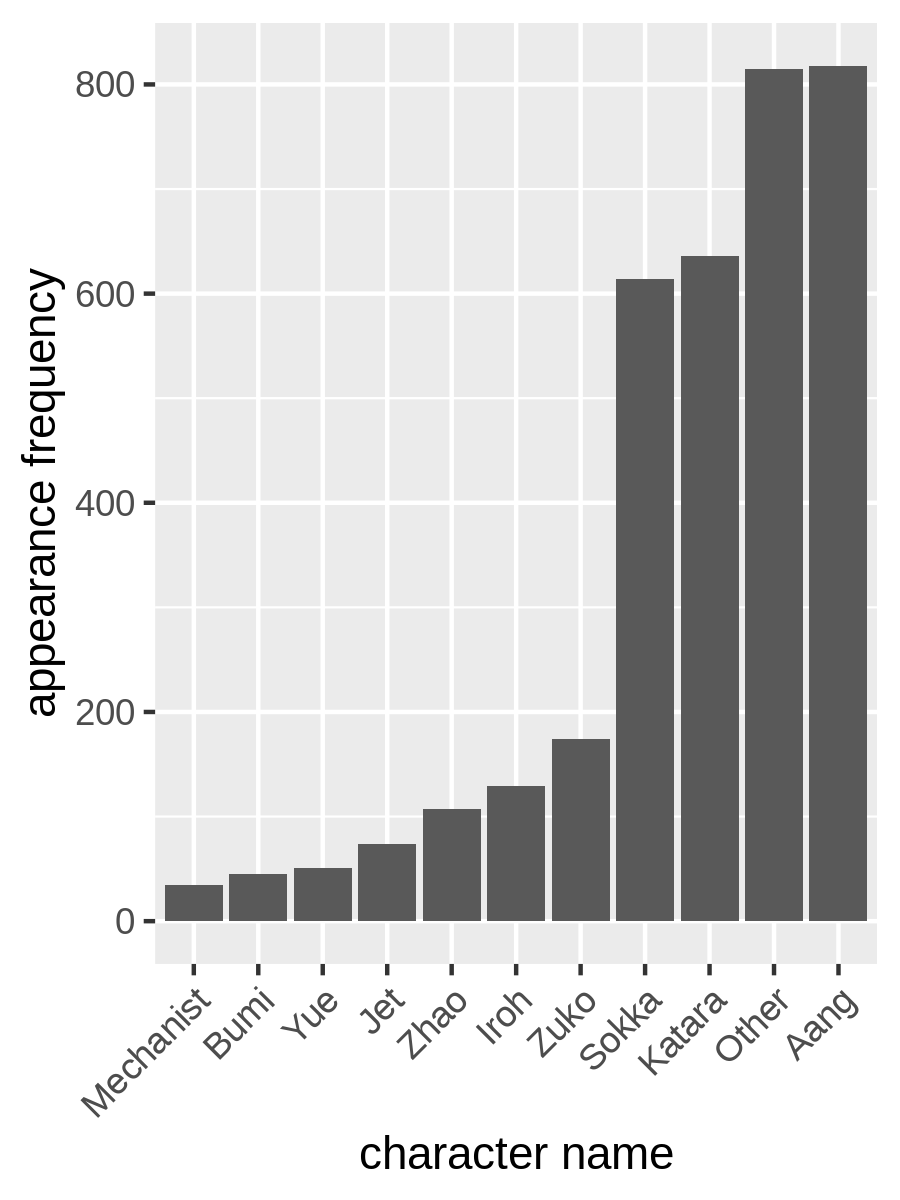

In [20]:
p = ggplot(book1, aes(x = character, y = book_num))
p = p + geom_bar(stat = "identity")
p = p + theme(axis.text.x = element_text(angle = 45, hjust = 1))
p = p + labs(y= "appearance frequency", x = "character name") 
p

Preview the `book2` data set using the `head` function.

In [14]:
book2 %>% head

character,n
<fct>,<int>
Other,952
Sokka,499
Aang,492
Katara,413
Toph,242
Iroh,181


**Using `geom_col` plot the number of times each character speaks in Book Two**

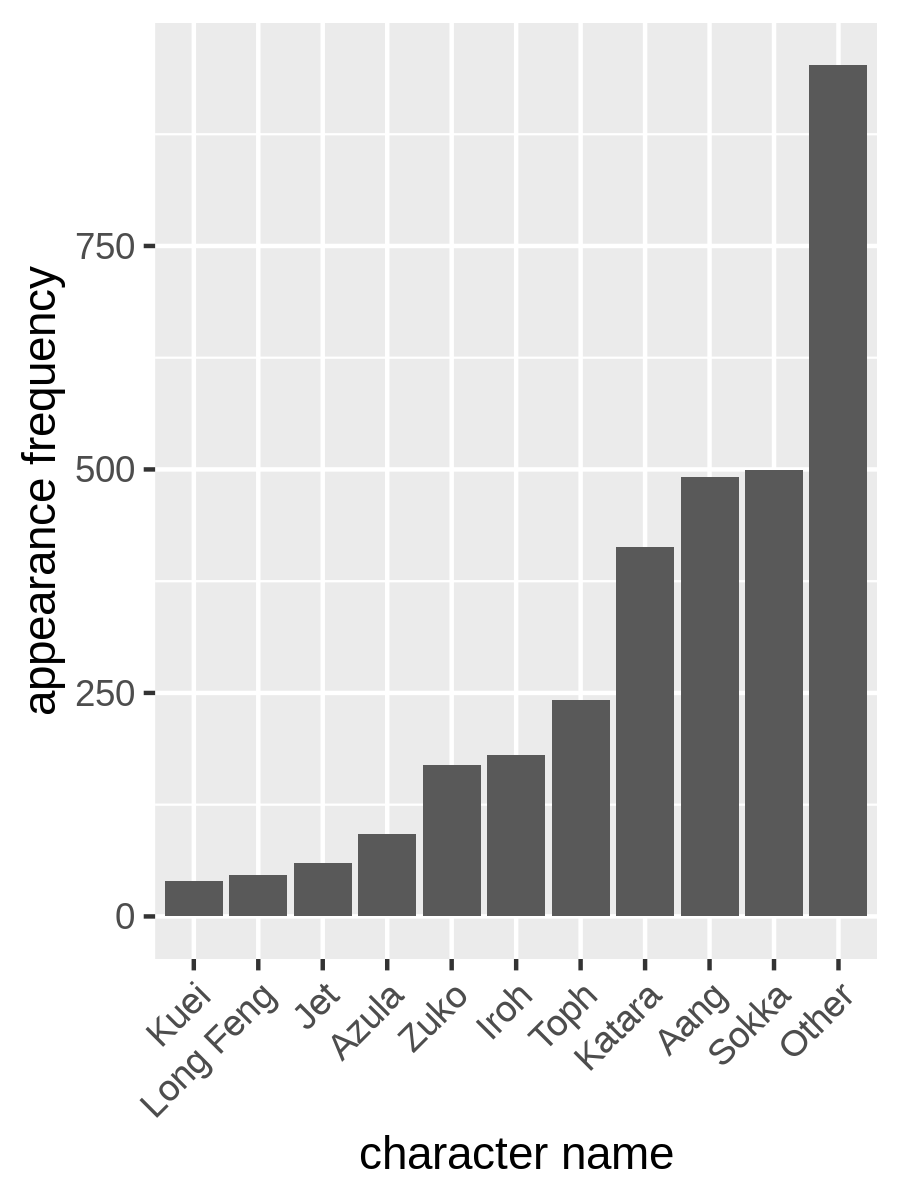

In [21]:
p = ggplot(book2, aes(x = character, y = n))
p = p + geom_col()
p = p + theme(axis.text.x = element_text(angle = 45, hjust = 1))
p = p + labs(y= "appearance frequency", x = "character name") 
p